<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>


<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>


## Import


In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

## Exploring your data


### Read cleaned data from file (0.25 points)


We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.


In [3]:
# YOUR CODE HERE
cleaned_df = pd.read_csv('../data/processed/21120465_europe_processed.csv')
# cleaned_df = None
# raise NotImplementedError()

In [4]:
# TEST
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,2775634.0,1391086.0,1384548.0,10.813117,10.096538,9.0,26.361868,9.386339,8.456056,15.410524,...,7131.404452,19.002727,73.712777,74.398198,80.747814,95.606712,62.731991,97.748993,2022,Albania
1,2811666.0,1407212.0,1404454.0,10.240000,11.325000,9.0,21.562780,34.618040,39.186390,17.459200,...,7131.404452,19.002727,73.712777,74.087000,79.173000,97.604950,60.317581,98.223259,2021,Albania
2,2837849.0,1418585.0,1419264.0,10.285000,10.785000,9.0,20.781540,35.541970,40.169250,16.812830,...,7131.404452,44.580000,73.712777,74.632000,79.676000,100.613602,61.392578,99.468590,2020,Albania
3,2854191.0,1425363.0,1428828.0,10.343000,8.480000,9.0,20.150670,36.416850,41.600220,16.203900,...,7131.404452,40.110000,73.712777,77.168000,81.666000,104.310257,62.076092,101.720718,2019,Albania
4,2866376.0,1430495.0,1435881.0,10.517000,8.308000,9.0,19.745660,37.285730,42.271740,15.573180,...,7131.404452,37.830000,73.712777,77.037000,81.608000,107.403679,56.608871,105.708557,2018,Albania


In [5]:
# TEST
cleaned_df.shape

(1120, 25)

### Numerical analysis using descriptive statistics (0.25 points)


Descriptive statistics show the characteristics of numerical features. It shows us the information such as:

- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation

Due the scope of this lab, you just need to use basic function of Pandas to calculate basic descriptive statistics information and give insights from it.


In [25]:
pd.set_option('display.max_colwidth', 100)  # Để dễ nhìn
pd.set_option('display.max_columns', None)  # Để dễ nhìn
df_copy = cleaned_df.drop(['Year', 'Country'], axis='columns')
df_copy.head()

# Calculate the mean for each numeric column
means = df_copy.mean()

# Calculate the median for each numeric column
medians = df_copy.median()

# Calculate the standard deviation for each numeric column
std_devs = df_copy.std()

# Calculate the 25th percentile (1st quartile) for each numeric column
q1 = df_copy.quantile(0.25)

# Calculate the 75th percentile (3rd quartile) for each numeric column
q3 = df_copy.quantile(0.75)

# Calculate the range for each numeric column
ranges = df_copy.max() - df_copy.min()

# Calculate the interquartile range (IQR) for each numeric column
iqr = q3 - q1

# Calculate the skewness for each numeric column
skewness = df_copy.skew()

# Calculate the kurtosis for each numeric column
kurtosis = df_copy.kurtosis()

# Calculate the coefficient of variation (CV) for each numeric column
cv = (std_devs / means) * 100

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Std Dev': std_devs,
    '1st Quartile': q1,
    '3rd Quartile': q3,
    'Range': ranges,
    'IQR': iqr,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Coefficient of Variation': cv
})
print(stats_df)
# YOUR CODE HERE
# raise NotImplementedError()

                                                    Mean        Median  \
Total Population                            1.399210e+07  5.376422e+06   
Female Population                           7.200463e+06  2.743866e+06   
Male Population                             6.791642e+06  2.625598e+06   
Birth Rate                                  1.081312e+01  1.069900e+01   
Death Rate                                  1.009654e+01  9.800000e+00   
Compulsory Education Dur.                   1.023197e+01  1.000000e+01   
Employment in Industry(%)                   2.636187e+01  2.636187e+01   
Employment in Agriculture(%)                9.386339e+00  7.010980e+00   
Female Employment in Agriculture(%)         8.456056e+00  4.831188e+00   
Female Employment in Industry(%)            1.541052e+01  1.541052e+01   
Unemployment(%)                             9.451621e+00  8.385500e+00   
GDP in USD                                  4.140708e+11  1.126508e+11   
National Income per Capita            

**TODO**: Give your obervation here


### Describe the correlation between features in the dataset (0.75 points)


Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.


Now let's make a correlation matrix, then visualize it, and describe what insights you observed?


In [7]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

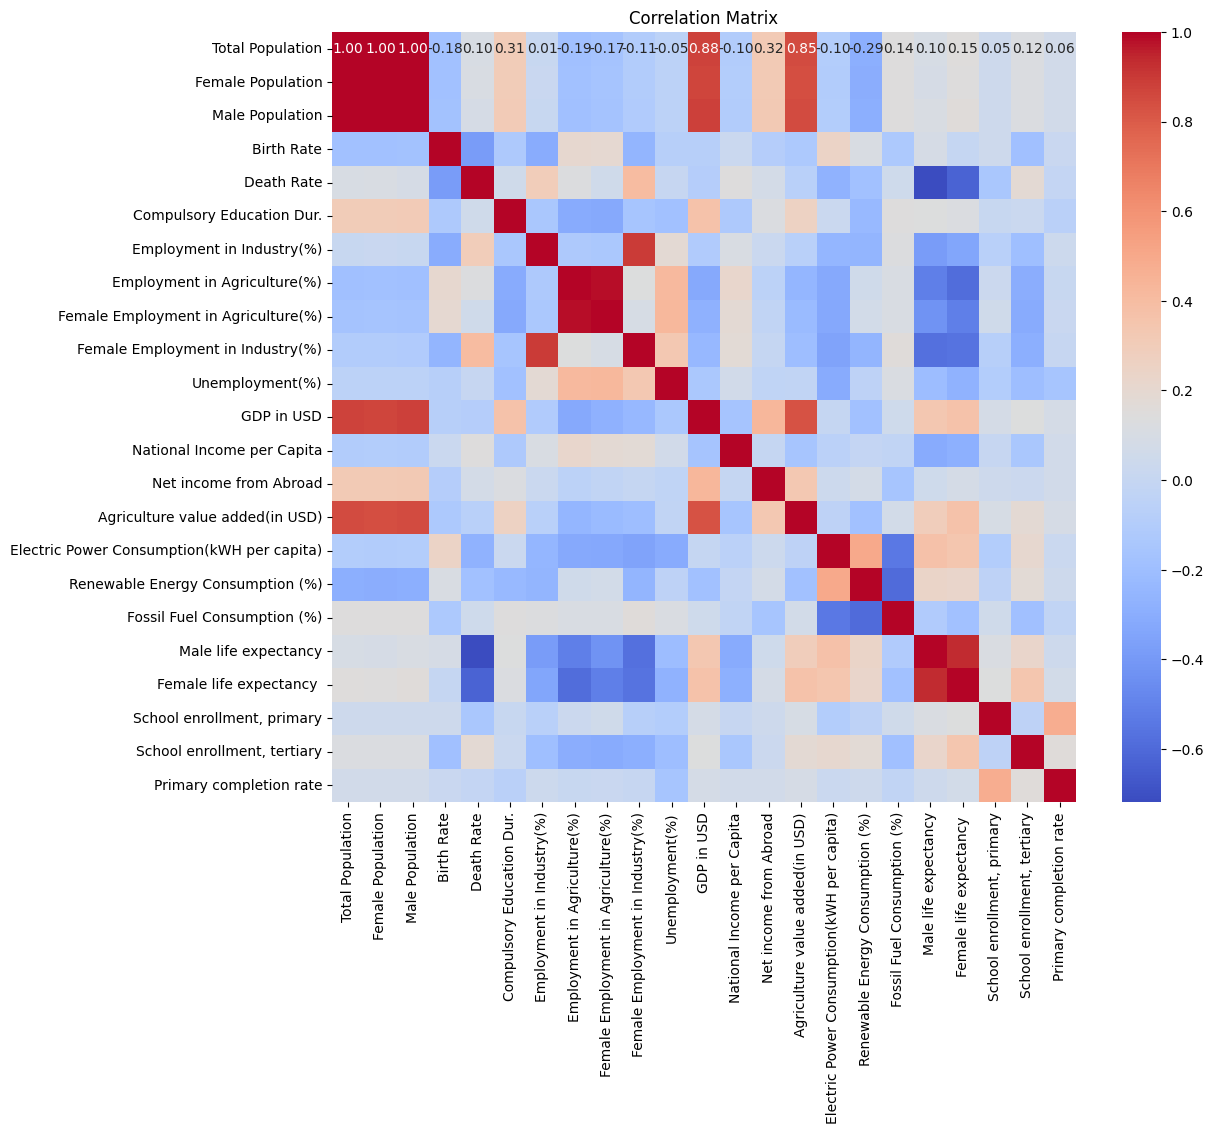

In [26]:
# YOUR CODE HERE
# create a copy
df = df_copy.copy()
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# raise NotImplementedError()

**Question 01**: How does the correlation between features change in the top 10 countries with the LARGEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is large.


In [9]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

Correlation Matrix for Top 10 Countries:
                                            Total Population  \
Total Population                                    1.000000   
Female Population                                   0.837686   
Male Population                                     0.874387   
Birth Rate                                          0.532114   
Death Rate                                          0.101636   
Compulsory Education Dur.                           0.115658   
Employment in Industry(%)                          -0.111579   
Employment in Agriculture(%)                        0.408619   
Female Employment in Agriculture(%)                 0.398032   
Female Employment in Industry(%)                    0.037792   
Unemployment(%)                                    -0.143276   
GDP in USD                                          0.064969   
National Income per Capita                         -0.176515   
Net income from Abroad                              0.169414   

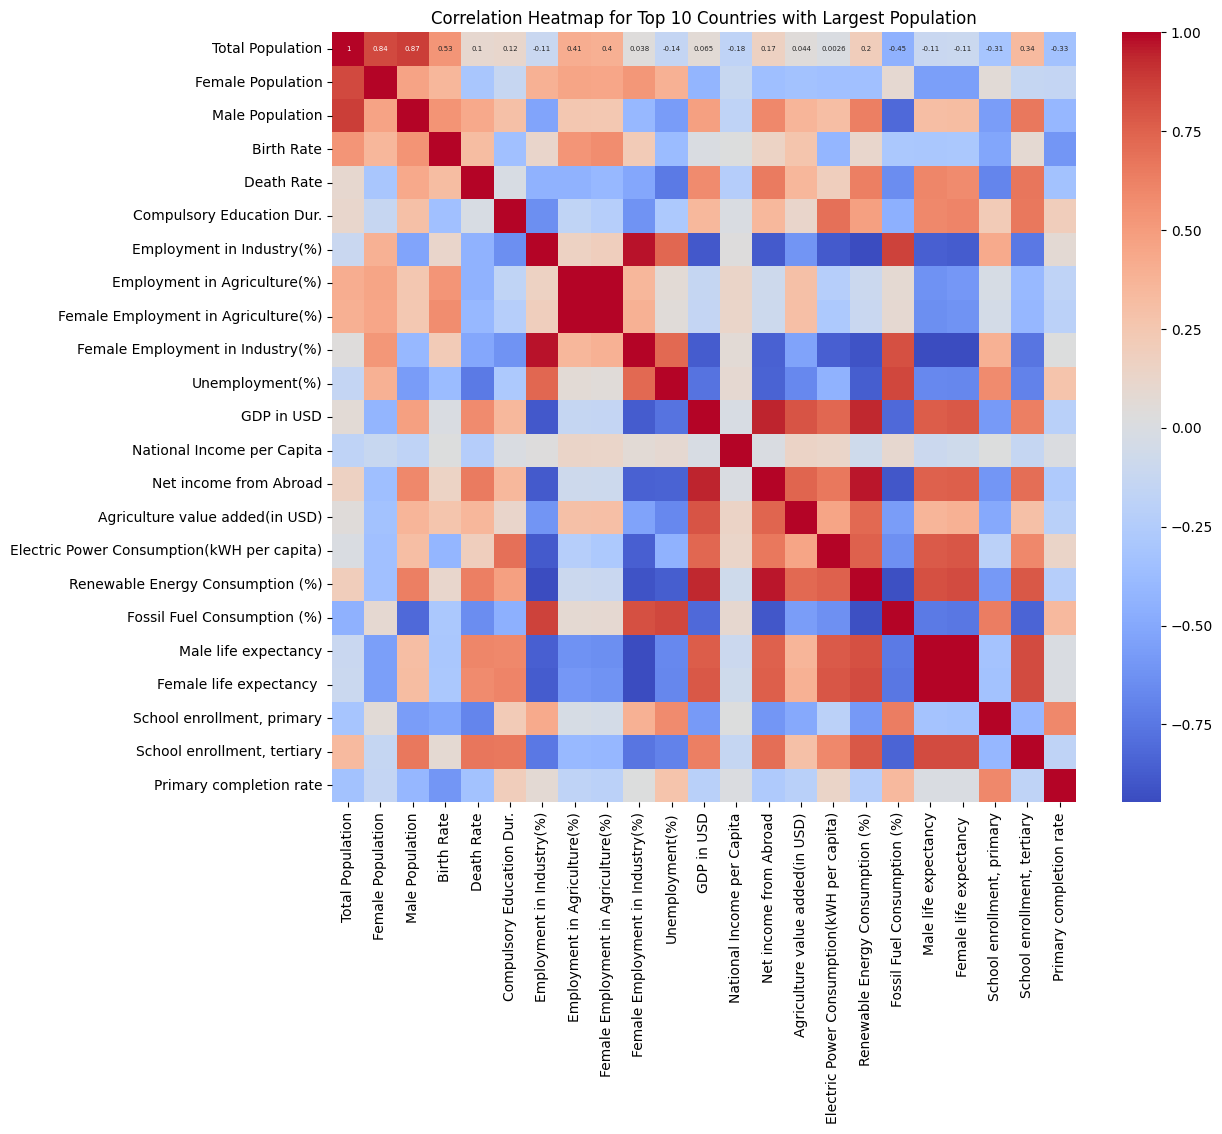

In [38]:
# YOUR CODE HERE
top_10_countries = cleaned_df.nlargest(10, 'Total Population')

# Create a subset of the DataFrame with data for the top 10 countries
subset_df = cleaned_df[cleaned_df['Country'].isin(
    top_10_countries['Country'])].copy().drop(['Year', 'Country'], axis='columns')

# Calculate the correlation matrix for the subset
subset_correlation_matrix = subset_df.corr()


# Print or analyze the two correlation matrices
print("Correlation Matrix for Top 10 Countries:")
print(subset_correlation_matrix)


plt.figure(figsize=(12, 10))

# Heatmap for the top 10 countries
sns.heatmap(subset_correlation_matrix, annot=True, annot_kws={"size": 5},
            cmap='coolwarm')
plt.title(
    'Correlation Heatmap for Top 10 Countries with Largest Population')


plt.show()

**YOUR ANSWER**


**Question 02**: How does the correlation between features change in the top 10 countries with the SMALLEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is small.


In [11]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

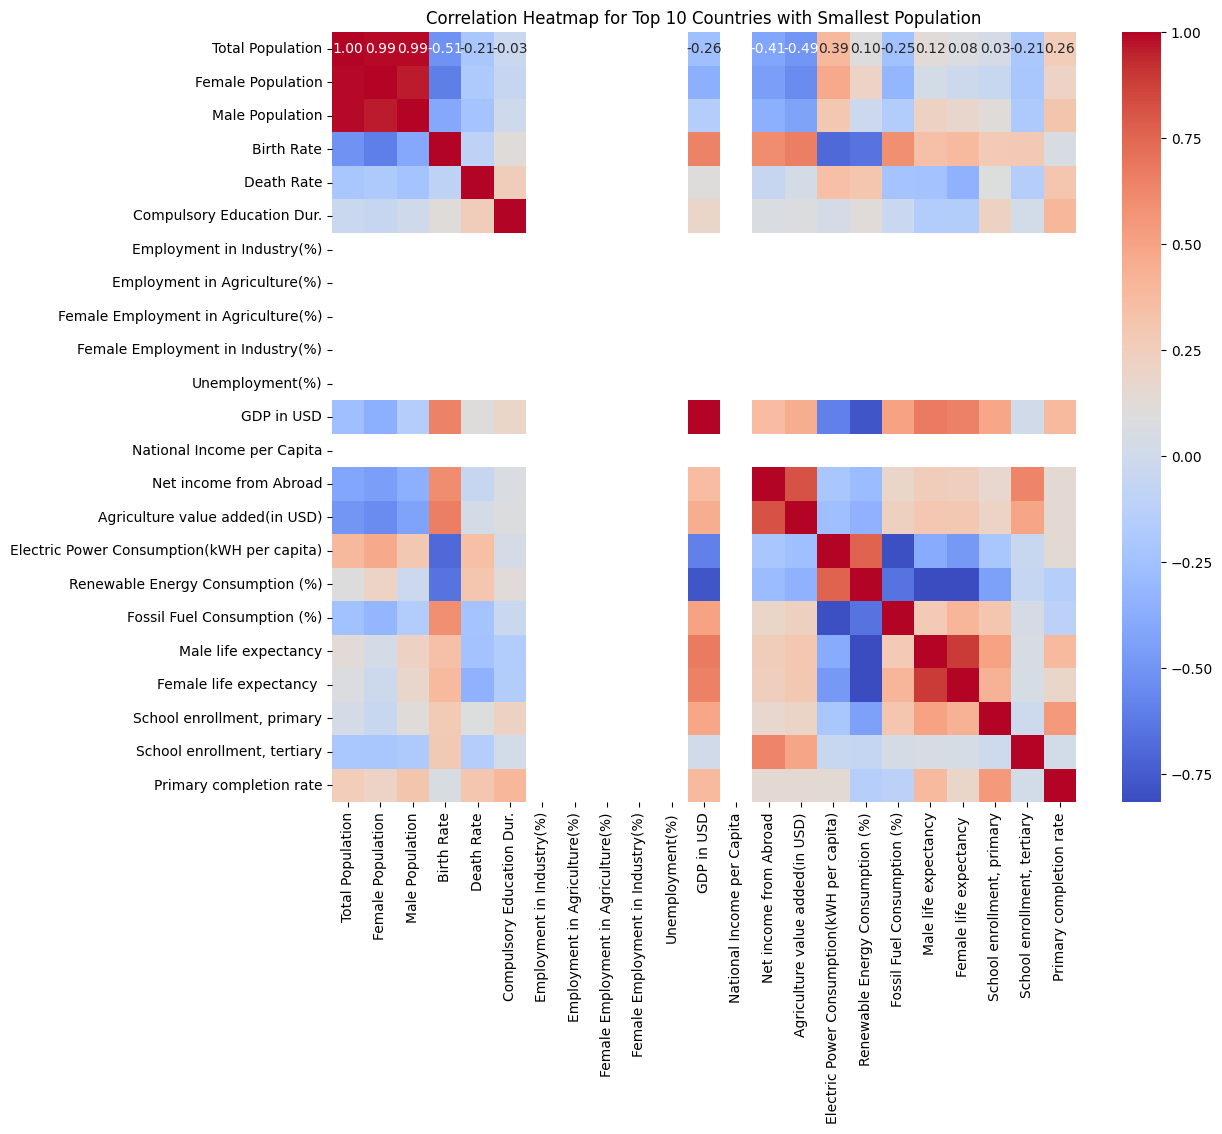

In [39]:
# YOUR CODE HERE
# YOUR CODE HERE
# Get the top 10 countries with the smallest population
bottom_10_countries = cleaned_df.nsmallest(10, 'Total Population')

# Create a subset of the DataFrame with data for the top 10 countries with the smallest population
bottom_subset_df = cleaned_df[cleaned_df['Country'].isin(
    bottom_10_countries['Country'])].copy().drop(['Year', 'Country'], axis='columns')

# Calculate the correlation matrix for the subset of the smallest population countries
bottom_subset_correlation_matrix = bottom_subset_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(bottom_subset_correlation_matrix,
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Top 10 Countries with Smallest Population')
plt.show()

**YOUR ANSWER**


## Making a question? (1.25 points)


After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** What is the population situation of the countries on the continent today?

**Answering this question will** help us to see the current population status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Birth Rate and Death Rate for countries across all the year.


### Pre-processing


In [13]:
# YOUR CODE HERE (OPTION)

### Analyzing to get the answer


Step 01: construct Average Birth Rate dataframe for each country.


In [41]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()
avg_birthrate_df = cleaned_df.groupby(
    'Country')['Birth Rate'].mean().reset_index()
avg_birthrate_df.head()

# YOUR CODE HERE

# raise NotImplementedError()

,Country,Birth Rate
0,Albania,13.738611
1,Austria,9.771897
2,Belarus,10.330933
3,Belgium,11.146897
4,Bosnia and Herzegovina,9.726040


18           Ireland
17           Iceland
0            Albania
10     Faroe Islands
26           Moldova
14         Gibraltar
12            France
29            Norway
24    Macedonia, FYR
39    United Kingdom
Name: Country, dtype: object


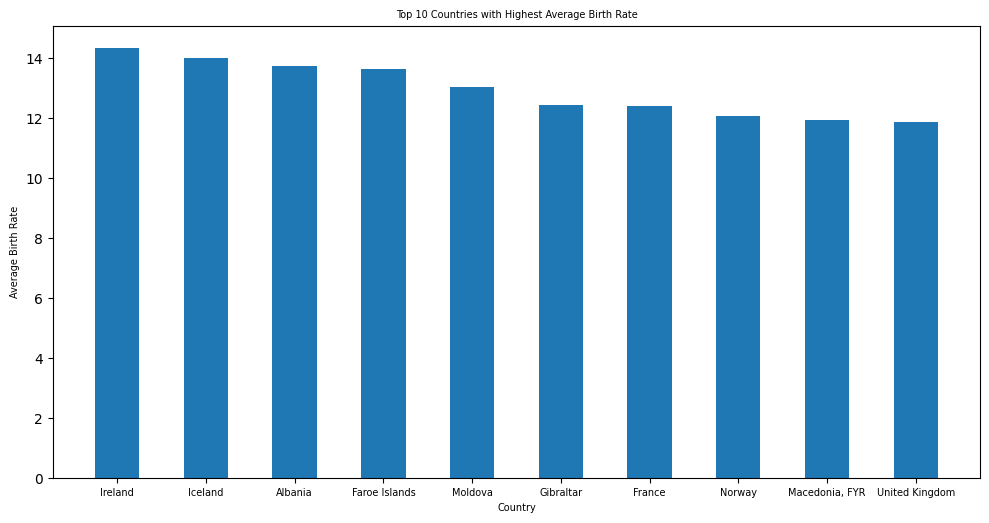

In [61]:
# You can just construct plotting for top countries

# Define bar width and font size
bar_width = 0.5
font_size = 7

avg_birthrate_df = avg_birthrate_df.sort_values(
    by='Birth Rate', ascending=False)
top_n = 10

# Create subplots
plt.figure(figsize=(10, 10))

# Plot top N countries with the highest average Birth Rate
plt.subplot(2, 1, 1)
plt.bar(avg_birthrate_df['Country'].head(
    top_n), avg_birthrate_df['Birth Rate'].head(top_n), width=bar_width)
print(avg_birthrate_df['Country'].head(top_n))
plt.title(
    f'Top {top_n} Countries with Highest Average Birth Rate', fontsize=font_size)
plt.xlabel('Country', fontsize=font_size)
plt.ylabel('Average Birth Rate', fontsize=font_size)
plt.xticks(fontsize=font_size)  # Change font size for country names

# Adjust layout for better visualization
plt.tight_layout()
plt.show()
# YOUR CODE HERE
# raise NotImplementedError()

Step 02: construct Average Death Rate dataframe for each country.


In [16]:
# Create a new dataframe
avg_deathrate_df = pd.DataFrame()
avg_deathrate_df = cleaned_df.groupby(
    'Country')['Death Rate'].mean().reset_index()
avg_deathrate_df.head()

# YOUR CODE HERE
# raise NotImplementedError()

,Country,Death Rate
0,Albania,7.194091
1,Austria,9.517733
2,Belarus,13.703341
3,Belgium,9.899876
4,Bosnia and Herzegovina,10.088876


38      Ukraine
5      Bulgaria
20       Latvia
2       Belarus
16      Hungary
26      Moldova
22    Lithuania
9       Estonia
6       Croatia
13      Germany
Name: Country, dtype: object


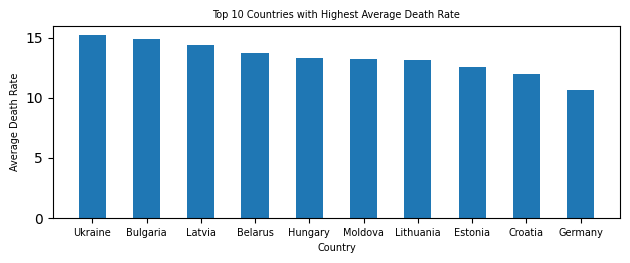

In [60]:
# You can just construct plotting for top countries
# Sort and select top N countries
avg_deathrate_df = avg_deathrate_df.sort_values(
    by='Death Rate', ascending=False)


# Plot top N countries with the highest average Death Rate
plt.subplot(2, 1, 2)
plt.bar(avg_deathrate_df['Country'].head(
    top_n), avg_deathrate_df['Death Rate'].head(top_n), width=bar_width)
print(avg_deathrate_df['Country'].head(top_n))
plt.title(
    f'Top {top_n} Countries with Highest Average Death Rate', fontsize=font_size)
plt.xlabel('Country', fontsize=font_size)
plt.ylabel('Average Death Rate', fontsize=font_size)
plt.xticks(fontsize=font_size)  # Change font size for country names

# Adjust layout for better visualization
plt.tight_layout()
plt.show()
# raise NotImplementedError()

**TODO**: Give your obervation here

- Country with a high birth rate and a low death rate are likely expriencing population grow, which could lead to a larger labor force in the future. On other hand, countries with a low birth rate and a high death rate may be facing population decline, which could lead to a larger labor force in the future.
- From the visualization, it seems like Ireland, Iceland , and Albania have the highest birth rates, while Ukraine, Bulgaria, Latvia have the highest death rates. This could suggest that the former group of countries are experiencing population growth, while the latter group are experiencing population decline.


## Making your own question 01? (1.5 points)


**YOUR ANSWER HERE**
GitHub Copilot: Based on your dataset and the question template, here's a possible question and how to answer it:

**A possible question could be**: "How has the duration of compulsory education and employment in industry changed over the years in different countries, and what could be its potential implications on the country's socio-economic development?"

**Answering this question** will help us understand the emphasis different countries place on education and industry employment over time. This could provide insights into potential educational and economic policies and their effectiveness.

**To answer this question**, we can plot the 'Compulsory Education Dur.' and 'Employment in Industry(%)' for each year for each country. This will give us a visual representation of the trend over time. We can also calculate the average duration of compulsory education and employment in industry across all countries for each year to see the global trend.


### Pre-processing


In [18]:
# YOUR CODE HERE (OPTION)

### Analyzing to get the answer


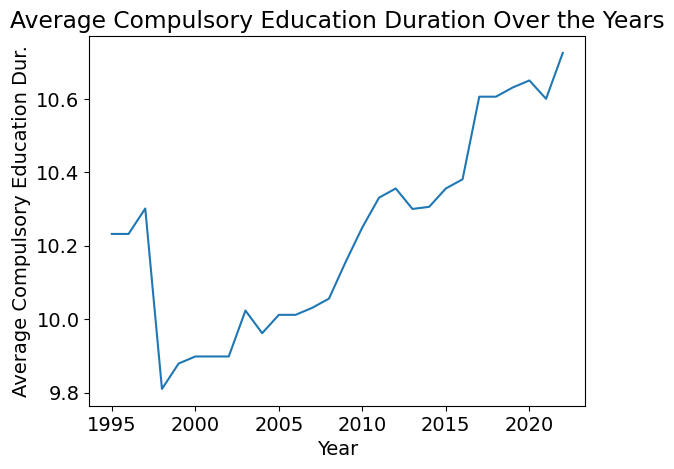

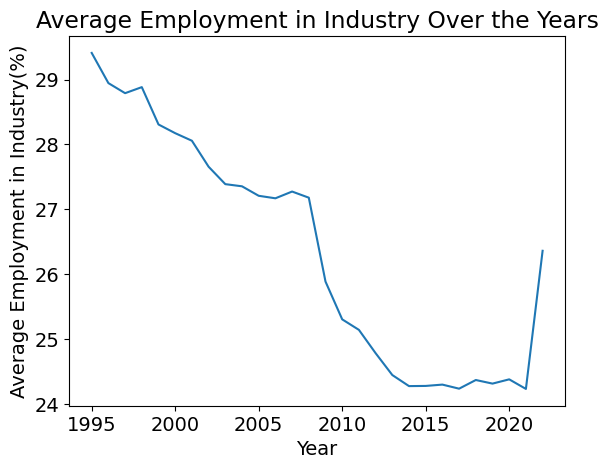

The correlation between 'Compulsory Education Dur.' and 'Employment in Industry(%)' is -0.1452963470798698


In [95]:
# Set the font size
plt.rcParams['font.size'] = 14

# Group by 'Year' and calculate the mean of 'Compulsory Education Dur.' and 'Employment in Industry(%)'
average_df = cleaned_df.groupby('Year').agg(
    {'Compulsory Education Dur.': 'mean', 'Employment in Industry(%)': 'mean'}).reset_index()

# Create a line plot for 'Compulsory Education Dur.' for each year
sns.lineplot(x='Year', y='Compulsory Education Dur.', data=average_df)
plt.xlabel('Year')
plt.ylabel('Average Compulsory Education Dur.')
plt.title('Average Compulsory Education Duration Over the Years')
plt.show()

# Create a line plot for 'Employment in Industry(%)' for each year
sns.lineplot(x='Year', y='Employment in Industry(%)', data=average_df)
plt.xlabel('Year')
plt.ylabel('Average Employment in Industry(%)')
plt.title('Average Employment in Industry Over the Years')
plt.show()

# Calculate the correlation between 'Compulsory Education Dur.' and 'Employment in Industry(%)'
correlation = cleaned_df['Compulsory Education Dur.'].corr(
    cleaned_df['Employment in Industry(%)'])
print(
    f"The correlation between 'Compulsory Education Dur.' and 'Employment in Industry(%)' is {correlation}")

**Observation**
Base on the result, it appears that over the years, the average duration of compulsory education has generally increased. This could indicate a global trend towards valuing education and investing more time in it.

On the other hand, the percentage of employment in industry seems to have a slight downward trend. This could be due to various factors such as advancements in technology leading to automation, shifts in the types of industries contributing to employment, or changes in the global economy.

The correlation between the two variables is approximately -0.145, indicating a weak negative relationship. This suggests that as the duration of compulsory education increases, the percentage of employment in industry slightly decreases. However, the correlation is weak, so it's likely that other factors also play a significant role in these trends.


## Making your own question 02? (1.5 points)


**YOUR ANSWER HERE**
**A possible question could be**: "What is the trend of renewable energy consumption in relation to the total population over the years?"

**Answering this question** will help us understand how the consumption of renewable energy has evolved as the population has grown. This could provide insights into a country's efforts towards sustainable energy practices.

**To answer this question**, we can plot the 'Total Population' against 'Renewable Energy Consumption (%)' for each year. This will give us a visual representation of the trend over time.


### Pre-processing


In [82]:
# YOUR CODE HERE (OPTION)

### Analyzing to get the answer


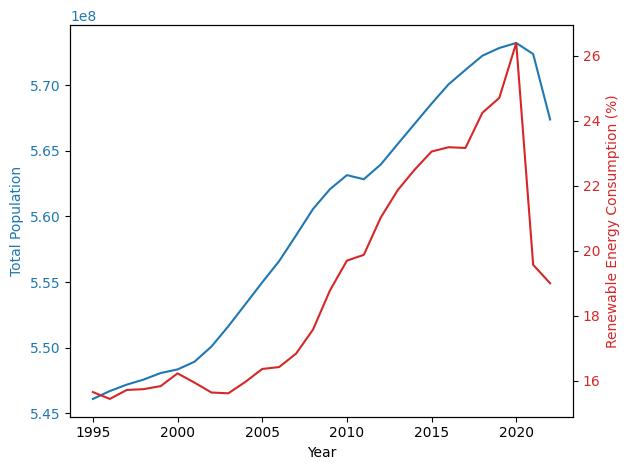

The correlation between 'Total Population' and 'Renewable Energy Consumption (%)' is -0.29401306637593216


In [83]:
grouped_df = cleaned_df.groupby('Year').agg(
    {'Total Population': 'sum', 'Renewable Energy Consumption (%)': 'mean'}).reset_index()

# Plot Total Population and Renewable Energy Consumption (%) over the years
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Population', color=color)
ax1.plot(grouped_df['Year'], grouped_df['Total Population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Renewable Energy Consumption (%)', color=color)
ax2.plot(grouped_df['Year'],
         grouped_df['Renewable Energy Consumption (%)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Caculate the correlation
correlation = df['Total Population'].corr(
    df['Renewable Energy Consumption (%)'])

print(
    f"The correlation between 'Total Population' and 'Renewable Energy Consumption (%)' is {correlation}")

**Observation**
Based on the result, we can observe the following:

1. The total population has been generally increasing over the years from 1995 to 2022, with a slight decrease in the last few years.

2. The renewable energy consumption (%) has also been generally increasing over the same period, with a significant increase in the last few years.

This suggests that as the population has grown, the proportion of energy consumption from renewable sources has also increased. This could be due to a variety of factors, such as advancements in renewable energy technology, increased awareness of environmental issues, or policy changes promoting renewable energy use.

It's also worth noting that the renewable energy consumption (%) saw a decrease in the last couple of years. This could be due to a variety of factors and would require further investigation.
